In [1]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
 
def run_ERRW(G, dw, T, n0=None):
    """
    Running the ERRW.

    Parameters
    ----------
    G : networkx Graph
        Underlying structure.
    dw : float
        Edge-reinforcement.
    T : int
        Number of steps of the walk.
    n0: object (default=None)
        Seed node (has to be in G).
    
    Returns
    -------
    S : list
        List of visited nodes.
        
    Note: the number of nodes N should be at least one order of magnitude greater than T
    """
    
    def get_next_node(G, initial_node):
        neighbors = list(G.neighbors(initial_node))
        weights = np.array([G[initial_node][neighbor]['weight'] for neighbor in neighbors])
        norm_weights = 1.*weights/sum(weights)
        next_node = np.random.choice(neighbors, p=norm_weights)
        return next_node

    #Setting the weights to the initial value
    nx.set_edge_attributes(G, values=1, name='weight')
    #Setting the seed node
    if n0==None:
        #Random seed
        walker_position = random.choice(list(G.nodes))
    else:
        #Provided seed
        walker_position = n0
    
    #Here I will store the walk sequence
    S = []    
    S.append(walker_position)

    for t in range(T):
        #Choosing the next node proportionally to the weights
        next_node = get_next_node(G, walker_position)
        #Reinforcing the weight of the traversed edge
        G[walker_position][next_node]['weight'] += dw
        walker_position = next_node
        S.append(walker_position)
        
    return S

def get_Heaps(S):
    """
    Computing the Heaps' law
    
    Parameters
    ----------
    S : list
        List of visited nodes. 
    
    Returns
    -------
    D : list
        List of unique number of visited nodes.
    
    """
    unique_items = set()
    D = []
    D.append(len(unique_items))
    for s in S:
        unique_items.add(s)
        D.append(len(unique_items))
    return D

In [2]:
#ERRW parameters
dw = 0.001
T = 100000

#SW network parameters
N = 1000000
K = 4
p = 0.2

G = nx.connected_watts_strogatz_graph(n=N, k=K, p=p, tries=500)

In [3]:
S = run_ERRW(G, dw, T, n0=None)
D = get_Heaps(S)

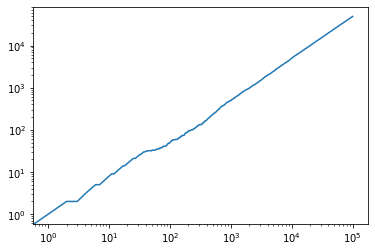

In [4]:
plt.plot(D)
plt.yscale('log')
plt.xscale('log')